Universidad Galileo

Text Mining and Image Recognition

PAPD - Sección V

Sergio José Barrios Martínez

Carnet No. 19012765

## Hoja de Trabajo No. 4


### Problema 1:
Para este problema deberá hacer análisis de sentimientos para un conjunto de reviews de **Yelp**, deberá mostrar las siguientes métricas sobre el conjunto de reviews:
1. Mostrar el porcentaje de comentarios positivos y comentarios negativos en una misma gráfica
2. Mostrar una gráfica tipo boxplot para la distribución de los resultados de la polaridad y la subjetividad
3. Deberá realizar un análisis estadístico con comentarios sobre los resultados de sus hallazgos a partir de las graficas anteriores.

In [1]:
import requests
import re
import numpy as np
import pandas as pd

Se encuentra el número total de Reviews declarados como contabilizados en la página, para un Restaurante llamado "Azul":

In [7]:
response = requests.get('https://www.yelp.com/biz/azul-ciudad-de-m%C3%A9xico')
TextoInicio = '<p class="lemon--p__373c0__3Qnnj text__373c0__2U54h text-color--mid__373c0__27i5f text-align--left__373c0__1Uy60 text-size--large__373c0__1j9OF">'
TextoFinal ='reviews</p>'

numeroreviews = re.search(TextoInicio + '(.+?)' + TextoFinal, response.text).group(1)
numeroreviews = np.int(numeroreviews)
numeroreviews

283

Se arma el Corpus a realizar el Sentiment Analysis:

In [8]:
TextoInicio ='<span class="lemon--span__373c0__3997G raw__373c0__3rKqk" lang="en">'
TextoFinal = '</span>'

corpus = []

for i in range(0,numeroreviews,20):
    print (i)
    string = 'https://www.yelp.com/biz/azul-ciudad-de-méxico?start='+str(i)
    print(string)
    response = requests.get(string)
    print(response.status_code)
    completeHTML = response.text
    indexList = [(element.start(0), element.end(0)) for element in re.finditer(TextoInicio + '(.+?)' + TextoFinal, completeHTML)]

    for index in indexList:
        inf = index[0]
        sup = index[1]

        review = completeHTML[inf + len(TextoInicio): sup - len(TextoFinal)]
        print(review)
        print('----')
        corpus.append(review)

0
https://www.yelp.com/biz/azul-ciudad-de-méxico?start=0
200
What a wonderful experience.  It is a very busy restaurant so if you know ahead of time I would make reservations otherwise it is first come, first serve.  Right when you walk in the courtyard you get a view and some ladies making homemade tortillas.  It is in a very nice courtyard with some very nice shopping upstairs.  <br><br>They bring out a very nice antipasto dish with olives, tomatoes, and olive oil to start with bread.  I had the aqua fresca to drink which was a limonata flavor and chia seeds.  It was so nice and refreshing and the chia seeds gave it a nice texture.  I started with the 18 flowers soup which they call a &#34;Mexican luxury&#34;.  It is made from zucchini squash and the blossoms of the zucchini.  It was soooo delicious!  Very creamy and I did not want it to end.  My main course was the black mole enchiladas.  You usually find black mole in Oaxaca.  It was such a great flavor and such a difference to my 

Normalización del Corpus:

In [10]:
allReviews = []
for index, review in enumerate(corpus):
    review = review.replace('<br>','')
    review = review.replace('&#39;',"'")
    review = review.replace(u'\xa0'," ")
    review = review.lower()
    review = review.rstrip('\n')
    allReviews.append(review)

Número de Reviews en el Corpus:

In [11]:
len(allReviews)

234

### Sentiment Analysis

In [19]:
from textblob import TextBlob

polarities = []
subjs = []
label = []

for review in allReviews:
    sentimiento = TextBlob(review)
    polarities.append(sentimiento.polarity)
    subjs.append(sentimiento.subjectivity)

    if (sentimiento.polarity > 0.0):
        label.append('positivo')
    elif (sentimiento.polarity < 0.0 ):
        label.append('negativo')
    else:
        label.append('neutro')

In [13]:
dataOut = pd.DataFrame({'polaridad':polarities,'subje':subjs,'etiqueta':label})
dataOut.head()

,polaridad,subje,etiqueta
0,0.271975,0.632679,positivo
1,0.101149,0.466034,positivo
2,0.288542,0.633333,positivo
3,0.459107,0.617232,positivo
4,0.410595,0.646667,positivo


In [21]:
dataOut.etiqueta.value_counts()

positivo    220
negativo     13
neutro        1
Name: etiqueta, dtype: int64

In [22]:
dataOut.etiqueta.value_counts()/len(dataOut)


positivo    0.940171
negativo    0.055556
neutro      0.004274
Name: etiqueta, dtype: float64

### Gráfica Positivos y Negativos

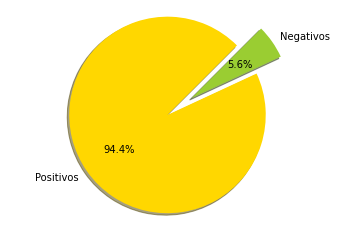

In [35]:
import matplotlib.pyplot as plt

# Gráfica de Pie:
labels = 'Positivos', 'Negativos'
sizes = [dataOut.etiqueta.value_counts()[0], dataOut.etiqueta.value_counts()[1]]
explode = (0, 0.3)  # separación de la segunda pieza del pie
colors = ['gold', 'yellowgreen']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # el pie tiene forma de círculo

plt.show()

### Box Plot de Polaridad y Subjetividad

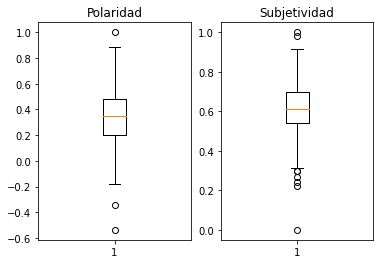

In [44]:
fig2, ax = plt.subplots(1,2)
ax[0].set_title('Polaridad')
ax[0].boxplot(dataOut.polaridad)
ax[1].set_title('Subjetividad')
ax[1].boxplot(dataOut.subje)
plt.show()

### Análsis Estadístico con Comentarios
Estadística Descriptiva de Reviews

In [45]:
dataOut.describe()

,polaridad,subje
count,234.000000,234.000000
mean,0.344702,0.618583
std,0.219304,0.136153
min,-0.536429,0.000000
25%,0.200000,0.541873
50%,0.350893,0.613812
75%,0.478460,0.700000
max,1.000000,1.000000


La mayor parte de los reviews (94.4%) tienen una polaridad positiva (mayor a cero) sin embargo, en promedio la polaridad es de 0.34, lo cual indica que es positiva la percepción sobre el restaurante, pero no extraordinaria (equivalente a tener una media cercana a un valor de 1). De hecho puede verificarse que el 75% de los reviews tiene una puntuación de polaridad menor a 0.5. Puede concluirse que en general la percepción es buena, pero no extraordinariamente buena.

En cuanto a la subjetividad, puede verificarse que la media es de 0.62, es decir, se encuentran más opiniones relacionadas con sentimientos y la percepción propia de cada individuo, que opiniones objetivas. En este análisis realmente hay poca información objetiva en los reviews. De hecho, solo el 25% de los reviews contienen información por debajo del 0.54 de subjetividad, es decir, reviews con algún valor objetivo.
Por este motivo, en general, se recomendaría trabajar en la imagen del restaurante, ya que la mayor parte de sus reviews provienen de la percepción que tienen del mismo.

### Problema 2:
Cree un web scraper para los reviews del sitio Trip Advisor, similar al demo trabajado durante la clase #8. Desarrolle un programa que le permita aplicar el análisis de sentimientos desarrollado por su persona en el ejercicio anterior, deberá analizar el código HTML para poder realizar exitosamente el web scraper.
Para el caso de Trip Advisor, podrá notar que la URL se modifica por medio de un parámetro llamado or-X donde X es el indice inicial de cada review. En Trip Advisor, los reviews están organizados en múltiplos de 5. A continuación se le muestra una URL y el parámetro de configuración mencionado:

https://www.tripadvisor.com.mx/Hotel_Review-g662606-d283869-Reviews-or5-Jardines_de_Nivaria_Adrian_Hoteles-Costa_Adeje_Adeje_Tenerife_Canary_Islands.html#REVIEW


In [10]:
response = requests.get('https://www.tripadvisor.com/Hotel_Review-g60713-d82116-Reviews-Marina_Motel-San_Francisco_California.html')
TextoInicio = '<q class="IRsGHoPm"><span>'
TextoFinal ='</span></q>'

review = re.search(TextoInicio + '(.+?)' + TextoFinal, response.text).group(1)
review

'What a find.  This motel possesses all of the charm you would expect of a boutique motel.  The rooms/suites are clean and comfortable.  We stayed in a king unit with full kitchen (kitchen had everything you need to prepare a meal along with a k-pod coffee maker, microwave, toaster, full fridge with freezer, oven and range, utensils, etc.) off the court yard. There is free onsite parking in individual garages; a rarity in The City. The location is ideal near the Presidio, Palace of Fine Arts and within walking distance to some amazing restaurants that have adjusted to outdoor dining during COVID-19.   Keep in mind that this facility was originally built back in the 1930&#39;s and the garages do not accommodate today&#39;s larger and wider vehicles.  I have a smaller VW and was worried</span><span class="_1M-1YYJt"> that I would hit my side mirrors when pulling in, fortunately I didn&#x27;t.   All units are upstairs, so if you have mobility issues, this might not be the place for you.  

In [12]:
TextoInicio='<span class="_33O9dg0j">'
TextoFinal="reviews</span>"

numeroreviews = re.search(TextoInicio + '(.+?)' + TextoFinal, response.text).group(1)
numeroreviews = np.int(numeroreviews)
numeroreviews

694

Se arma el corpus para el Sentiment Analysis

In [16]:
TextoInicio = '<q class="IRsGHoPm"><span>'
TextoFinal ='</span></q>'

corpus = []
# Para hacer el scrapping completo, descomentar la siguiente linea. 
# Por motivos de prueba y para evitar el banneo de IP por parte de la página tripadvisor.com
# se mostrará el funcionamiento con las primeras 4 páginas

#for i in range(0,numeroreviews,5):
for i in range(0,20,5):
    print (i)
    string = "https://www.tripadvisor.com/Hotel_Review-g60713-d82116-Reviews-or"+str(i)+"-Marina_Motel-San_Francisco_California.html#REVIEWS"
    print(string)
    response = requests.get(string)
    print(response.status_code)
    completeHTML = response.text
    indexList = [(element.start(0), element.end(0)) for element in re.finditer(TextoInicio + '(.+?)' + TextoFinal, completeHTML)]

    for index in indexList:
        inf = index[0]
        sup = index[1]

        review = completeHTML[inf + len(TextoInicio): sup - len(TextoFinal)]
        print(review)
        print('----')
        corpus.append(review)

0
https://www.tripadvisor.com/Hotel_Review-g60713-d82116-Reviews-or0-Marina_Motel-San_Francisco_California.html#REVIEWS
200
What a find.  This motel possesses all of the charm you would expect of a boutique motel.  The rooms/suites are clean and comfortable.  We stayed in a king unit with full kitchen (kitchen had everything you need to prepare a meal along with a k-pod coffee maker, microwave, toaster, full fridge with freezer, oven and range, utensils, etc.) off the court yard. There is free onsite parking in individual garages; a rarity in The City. The location is ideal near the Presidio, Palace of Fine Arts and within walking distance to some amazing restaurants that have adjusted to outdoor dining during COVID-19.   Keep in mind that this facility was originally built back in the 1930&#39;s and the garages do not accommodate today&#39;s larger and wider vehicles.  I have a smaller VW and was worried</span><span class="_1M-1YYJt"> that I would hit my side mirrors when pulling in, 

### Normalización del Corpus:

In [17]:
allReviews = []
for index, review in enumerate(corpus):
    review = review.replace('<br>','')
    review = review.replace('&#39;',"'")
    review = review.replace(u'\xa0'," ")
    review = review.lower()
    review = review.rstrip('\n')
    allReviews.append(review)

In [18]:
len(allReviews)

20

### Sentiment Analysis

In [19]:
from textblob import TextBlob

polarities = []
subjs = []
label = []

for review in allReviews:
    sentimiento = TextBlob(review)
    polarities.append(sentimiento.polarity)
    subjs.append(sentimiento.subjectivity)

    if (sentimiento.polarity > 0):
        label.append('positivo')
    elif (sentimiento.polarity < 0 ):
        label.append('negativo')
    else:
        label.append('neutro')

In [20]:
dataOut = pd.DataFrame({'polaridad':polarities,'subje':subjs,'etiqueta':label})
dataOut.head()

,polaridad,subje,etiqueta
0,0.269599,0.563272,positivo
1,0.475000,0.591667,positivo
2,-0.062500,0.687500,negativo
3,0.168810,0.508333,positivo
4,0.277615,0.511008,positivo


In [21]:
dataOut.etiqueta.value_counts()/len(dataOut)

positivo    0.85
negativo    0.15
Name: etiqueta, dtype: float64

### Gráfica Positivos y Negativos

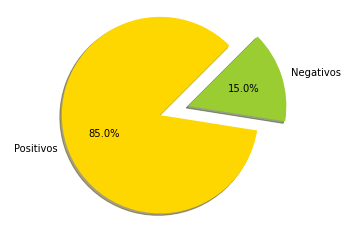

In [22]:
import matplotlib.pyplot as plt

# Gráfica de Pie:
labels = 'Positivos', 'Negativos'
sizes = [dataOut.etiqueta.value_counts()[0], dataOut.etiqueta.value_counts()[1]]
explode = (0, 0.3)  # separación de la segunda pieza del pie
colors = ['gold', 'yellowgreen']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=45)
ax1.axis('equal')  # el pie tiene forma de círculo

plt.show()

### Box Plot de Polaridad y Subjetividad

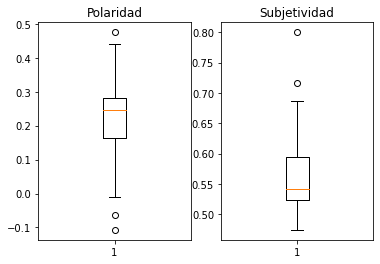

In [23]:
fig2, ax = plt.subplots(1,2)
ax[0].set_title('Polaridad')
ax[0].boxplot(dataOut.polaridad)
ax[1].set_title('Subjetividad')
ax[1].boxplot(dataOut.subje)
plt.show()